<a href="https://colab.research.google.com/github/RockhoRockho/Deep_Learning_Tensorflow/blob/main/_9_%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98(PyTorch)_%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이토치(PyTorch)

<img src="https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbuUgoV%2FbtqwWZvcHHX%2Fd6XzIFBEfiuFb0UvyV4A50%2Fimg.jpg" width="300">

- 코드 출처: https://pytorch.org/tutorials/

## 파이토치의 구성요소

- `torch`: 텐서를 생성하는 라이브러리

- `torch.autograd`: 자동미분 기능을 제공하는 라이브러리

- `torch.nn`: 신경망을 생성하는 라이브러리

- `torch.multiprocessing`: 병럴처리 기능을 제공하는 라이브러리

- `torch.utils`: 데이터 조작 등 유틸리티 기능 제공

- `torch.legacy`(./nn/.optim): Torch로부터 포팅해온 코드

- `torch.onnx`: ONNX(Open Neural Network Exchange)

  - 서로 다른 프레임워크 간의 모델을 공유할 때 사용

## 텐서(Tensors)
- 넘파이(NumPy)의 ndarray와 유사

- GPU를 사용한 연산 가속도 가능

In [1]:
import torch

In [2]:
torch.__version__

'1.10.0+cu111'

### 초기화 되지 않은 행렬 

In [3]:
x = torch.empty(4, 2)
print(x)

tensor([[-4.0424e+07,  3.0798e-41],
        [ 3.3631e-44,  0.0000e+00],
        [        nan,  3.0798e-41],
        [ 1.1578e+27,  1.1362e+30]])


### 무작위로 초기화된 행렬

In [4]:
x = torch.rand(4, 2)
print(x)

tensor([[0.9606, 0.3775],
        [0.2595, 0.8344],
        [0.2941, 0.6275],
        [0.5213, 0.3062]])


### dtype이 long, 0으로 채워진 텐서

In [5]:
x = torch.zeros(4, 2, dtype=torch.long)
print(x)

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])


In [6]:
x = torch.tensor([3, 2.3])
print(x)

tensor([3.0000, 2.3000])


In [7]:
x = x.new_ones(2, 4, dtype=torch.double)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


In [8]:
x = torch.randn_like(x, dtype=torch.float)
print(x)

tensor([[-0.9259,  0.8007,  1.2171,  0.5977],
        [ 0.5256,  0.6785,  0.5022,  1.2011]])


### 텐서의 크기

In [9]:
print(x.size())

torch.Size([2, 4])


## 텐서의 연산(operations)

### 덧셈 1

In [10]:
print(x)

tensor([[-0.9259,  0.8007,  1.2171,  0.5977],
        [ 0.5256,  0.6785,  0.5022,  1.2011]])


In [11]:
y = torch.rand(2, 4)
print(y)
print(x + y)

tensor([[0.4843, 0.9847, 0.6711, 0.5747],
        [0.7260, 0.4067, 0.3838, 0.9330]])
tensor([[-0.4417,  1.7854,  1.8882,  1.1725],
        [ 1.2516,  1.0852,  0.8861,  2.1341]])


### 덧셈2

In [12]:
print(torch.add(x, y))

tensor([[-0.4417,  1.7854,  1.8882,  1.1725],
        [ 1.2516,  1.0852,  0.8861,  2.1341]])


### 덧셈3
- 결과 텐서를 인자로 제공

In [13]:
result = torch.empty(2, 4)
torch.add(x, y, out=result)
print(result)

tensor([[-0.4417,  1.7854,  1.8882,  1.1725],
        [ 1.2516,  1.0852,  0.8861,  2.1341]])


### 덧셈4
- `in-place` 방식

- (참고) in-place 방식
  - in-place방식으로 텐서의 값을 변경하는 연산 뒤에는 _''가 붙음
  - `x.copy_(y), x.t_()`

In [14]:
print(x)
print(y)
y.add_(x)
print(y)

tensor([[-0.9259,  0.8007,  1.2171,  0.5977],
        [ 0.5256,  0.6785,  0.5022,  1.2011]])
tensor([[0.4843, 0.9847, 0.6711, 0.5747],
        [0.7260, 0.4067, 0.3838, 0.9330]])
tensor([[-0.4417,  1.7854,  1.8882,  1.1725],
        [ 1.2516,  1.0852,  0.8861,  2.1341]])


### 그 외의 연산
- `torch.sub` : 뺄셈

- `torch.mul` : 곱셉

- `torch.div` : 나눗셈

- `torch.mm` : 내적(dot product)

In [15]:
x = torch.Tensor([[1, 3],
                  [5, 7]])
y = torch.Tensor([[2, 4],
                  [6, 8]])
print(x - y)
print(torch.sub(x, y))
print(x.sub(y))

tensor([[-1., -1.],
        [-1., -1.]])
tensor([[-1., -1.],
        [-1., -1.]])
tensor([[-1., -1.],
        [-1., -1.]])


In [16]:
x = torch.Tensor([[1, 3],
                  [5, 7]])
y = torch.Tensor([[2, 4],
                  [6, 8]])
print(x * y)
print(torch.mul(x, y))
print(x.mul(y))

tensor([[ 2., 12.],
        [30., 56.]])
tensor([[ 2., 12.],
        [30., 56.]])
tensor([[ 2., 12.],
        [30., 56.]])


In [17]:
x = torch.Tensor([[1, 3],
                  [5, 7]])
y = torch.Tensor([[2, 4],
                  [6, 8]])
print(x / y)
print(torch.div(x, y))
print(x.div(y))

tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])
tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])
tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])


In [18]:
x = torch.Tensor([[1, 3],
                  [5, 7]])
y = torch.Tensor([[2, 4],
                  [6, 8]])
print(torch.mm(x, y))

tensor([[20., 28.],
        [52., 76.]])


## 텐서의 조작(manipulations)

### 인덱싱
- 넘파이처럼 인덱싱 사용가능

In [19]:
print(x)

tensor([[1., 3.],
        [5., 7.]])


In [20]:
print(x[:, 1])

tensor([3., 7.])


### view
- 텐서의 크기(size)나 모양(shape)을 변경

In [21]:
x = torch.randn(4, 5)
y = x.view(20)
z = x.view(5, -1)

print(x)
print(y)
print(z)

tensor([[ 1.2306,  0.5335, -0.6952,  0.5823,  0.8840],
        [ 1.2880, -0.0342, -1.4523, -1.7935, -1.0103],
        [ 0.3202,  0.6559, -1.5089,  0.0394, -1.1658],
        [ 0.1771,  1.4861, -0.2969,  2.4074,  0.6467]])
tensor([ 1.2306,  0.5335, -0.6952,  0.5823,  0.8840,  1.2880, -0.0342, -1.4523,
        -1.7935, -1.0103,  0.3202,  0.6559, -1.5089,  0.0394, -1.1658,  0.1771,
         1.4861, -0.2969,  2.4074,  0.6467])
tensor([[ 1.2306,  0.5335, -0.6952,  0.5823],
        [ 0.8840,  1.2880, -0.0342, -1.4523],
        [-1.7935, -1.0103,  0.3202,  0.6559],
        [-1.5089,  0.0394, -1.1658,  0.1771],
        [ 1.4861, -0.2969,  2.4074,  0.6467]])


### item
- 텐서에 값이 단 하나라도 존재하면 숫자값을 얻을 수 있음


In [22]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([0.2952])
0.2952146530151367
torch.float32


- 스칼라값 하나만 존재해야함

In [23]:
x = torch.randn(2)
print(x)
print(x.item())
print(x.dtype)

tensor([0.8309, 1.6877])


ValueError: ignored

### squeeze 
- 차원을 축소(제거)

In [24]:
tensor = torch.rand(1, 3, 3)
print(tensor)
tensor.shape

tensor([[[0.8635, 0.8283, 0.1884],
         [0.3841, 0.7787, 0.3616],
         [0.9257, 0.1845, 0.9691]]])


torch.Size([1, 3, 3])

In [25]:
t = tensor.squeeze()

print(t)
print(t.shape)

tensor([[0.8635, 0.8283, 0.1884],
        [0.3841, 0.7787, 0.3616],
        [0.9257, 0.1845, 0.9691]])
torch.Size([3, 3])


### unsqueeze
- 차원을 증가(생성)

In [26]:
tensor = torch.rand(1, 3, 3)
print(tensor)
print(tensor.shape)

tensor([[[0.4766, 0.5360, 0.4502],
         [0.6506, 0.8998, 0.2009],
         [0.6690, 0.4427, 0.8979]]])
torch.Size([1, 3, 3])


In [27]:
t = tensor.unsqueeze(dim=0)

print(t)
print(t.shape)

tensor([[[[0.4766, 0.5360, 0.4502],
          [0.6506, 0.8998, 0.2009],
          [0.6690, 0.4427, 0.8979]]]])
torch.Size([1, 1, 3, 3])


### stack
- 텐서간 결합

In [28]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])

print(torch.stack([x, y, z]))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


### cat
- 텐서를 결합하는 메소드(concatenate)

- 넘파이의 `stack`과 유사하지만, 쌓을 dim이 존재해야함
  - 예를 들어, 해당 차원을 늘려준 후 결합


In [29]:
a = torch.randn(1, 1, 3, 3)
b = torch.randn(1, 1, 3, 3)
c = torch.cat((a, b), dim=0)

print(c)
print(c.size())

tensor([[[[ 0.6103, -2.0261,  1.5006],
          [ 0.4250, -0.5721, -1.4219],
          [ 1.3360, -2.1778, -0.6460]]],


        [[[ 0.6886,  0.0872,  0.2061],
          [-0.8076, -2.0561,  1.5522],
          [-1.3523,  1.1950,  0.7330]]]])
torch.Size([2, 1, 3, 3])


In [30]:
a = torch.randn(1, 3, 3)
b = torch.randn(1, 3, 3)
c = torch.cat((a, b), dim=0)

print(c)
print(c.size())

tensor([[[-2.7463e-01,  1.4852e+00, -3.7318e-01],
         [ 5.3573e-01, -1.6146e-01, -3.3579e-02],
         [-3.0861e-01,  2.9206e-01, -1.7504e+00]],

        [[-8.6528e-01,  8.2397e-01, -2.6046e-04],
         [ 3.9694e-01, -1.5474e+00, -1.7688e+00],
         [-5.2614e-01, -4.5178e-01,  4.0727e-01]]])
torch.Size([2, 3, 3])


### chuck
- 텐서를 여러 개로 나눌 때 사용

- 몇 개의 텐서로 나눌 것이냐

In [31]:
tensor = torch.rand(3, 6)
t1, t2, t3 = torch.chunk(tensor, 3, dim=1)

print(tensor)
print(t1)
print(t2)
print(t3)

tensor([[0.4342, 0.5791, 0.8511, 0.4148, 0.2760, 0.6251],
        [0.9595, 0.4049, 0.6682, 0.8165, 0.2884, 0.8229],
        [0.7282, 0.0819, 0.1790, 0.3786, 0.6968, 0.1244]])
tensor([[0.4342, 0.5791],
        [0.9595, 0.4049],
        [0.7282, 0.0819]])
tensor([[0.8511, 0.4148],
        [0.6682, 0.8165],
        [0.1790, 0.3786]])
tensor([[0.2760, 0.6251],
        [0.2884, 0.8229],
        [0.6968, 0.1244]])


### split
- `chunck`와 동일한 기능이지만 조금 다름

- 하나의 텐서당 크기가 얼마이냐

In [32]:
tensor = torch.rand(3, 6)
t1, t2 = torch.split(tensor, 3, dim=1)
print(tensor)
print(t1)
print(t2)

tensor([[0.0485, 0.2311, 0.5094, 0.9764, 0.6594, 0.6713],
        [0.0805, 0.3183, 0.7622, 0.8350, 0.2845, 0.8054],
        [0.2909, 0.1273, 0.3101, 0.8737, 0.8000, 0.4695]])
tensor([[0.0485, 0.2311, 0.5094],
        [0.0805, 0.3183, 0.7622],
        [0.2909, 0.1273, 0.3101]])
tensor([[0.9764, 0.6594, 0.6713],
        [0.8350, 0.2845, 0.8054],
        [0.8737, 0.8000, 0.4695]])


### torch ↔ numpy
- Torch Tensor(텐서)를 Numpy array(배열)로 변환 가능

  - `numpy()`
  - `from_numpy()`

- (참고)
  - Tensor가 CPU상에 있다면 Numpy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변함

In [33]:
a = torch.ones(7)
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [34]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1. 1. 1.]


In [35]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2. 2. 2.]


In [36]:
import numpy as np

a = np.ones(7)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


## CUDA Tensors
- `.to` 메소드를 사용하여 텐서를 어떠한 장치로도 옮길 수 있음
  - 예) cpu, gpu

In [37]:
import torch

In [38]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([-0.4888])
-0.48878148198127747
torch.float32


In [39]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

y = torch.ones_like(x, device=device)
x = x.to(device)
z = x + y
print(device)
print(z)
print(z.to("cpu", torch.double))

cuda
tensor([0.5112], device='cuda:0')
tensor([0.5112], dtype=torch.float64)


## AUTOGRAD (자동미분)
- autograd 패키지는 Tensor의 모든 연산에 대해 **자동 미분** 제공

- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻

- backprop를 위한 미분값을 자동으로 계산

### Tensor

- data: tensor형태의 데이터

- grad: data가 겨쳐온 layer에 대한 미분값 저장

- grad_fn: 미분값을 계산한 함수에 대한 정보 저장 (어떤 함수에 대해서 backprop 했는지)

- `requires_grad` 속성을 `True`로 설정하면, 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작

- 계산이 완료된 후, `.backward()`를 호출하면 자동으로 `gradient`를 계산할 수 있으며, `.grad` 속성에 누적됨

- 기록을 추적하는 것을 중단하게 하려면, `.detach()`를 호출하여 연산기록으로부터 분리

- 기록을 추적하는 것을 방지하기 위해 코드 블럭을 `with torch.no_grad():`로 감싸면 `gradient`는 필요없지만, `requires_grad=True`로 설정되어 학습 가능한 매개변수를 갖는 모델을 평가(evaluate)할 때 유용

- Autograd 구현에서 매우 중요한 클래스 : `Function` 클래스

In [40]:
import torch

In [41]:
x = torch.ones(3, 3, requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [42]:
y = x + 5
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [43]:
print(y.grad_fn)

In [44]:
z = y * y * 2
out = z.mean()

print(z, out)

tensor([[72., 72., 72.],
        [72., 72., 72.],
        [72., 72., 72.]], grad_fn=<MulBackward0>) tensor(72., grad_fn=<MeanBackward0>)


- `requires_grad_(...)`는 기존 텐서의 `requires_grad`값을 바꿔치기(`in-place`)하여 변경

In [46]:
a = torch.randn(3, 3)
a = ((a * 3) / (a - 1))
print(a.requires_grad)

a.requires_grad_(True)
print(a.requires_grad)

b = (a * a).sum()
print(b.grad_fn)

False
True


### 기울기(Gradient)
- 역전파: `.backward()`를 통해 역전파 계산 가능

In [47]:
out.backward()

In [48]:
print(x.grad)

tensor([[2.6667, 2.6667, 2.6667],
        [2.6667, 2.6667, 2.6667],
        [2.6667, 2.6667, 2.6667]])


In [49]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
  y = y * 2

print(y)

tensor([1056.3308,  166.5717, -227.8553], grad_fn=<MulBackward0>)


In [50]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


- `with torch.no_grad()`를 사용하여 gradient의 업데이트를 하지 않음

In [51]:
print(x.requires_grad)
print((x **2).requires_grad)

with torch.no_grad():
  print((x ** 2).requires_grad)

True
True
False


- `detach()`: 내용물(content)은 같지만 require_grad가 다른 새로운 Tensor를 가져올 때

In [52]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)


### 자동 미분 흐름 다시 보기(1)
- 계산 흐름  
  $a \rightarrow b  \rightarrow c  \rightarrow out $

<br>

## $\quad \frac{\partial out}{\partial a} = ?$
- `backward()`를 통해  
  $a \leftarrow b  \leftarrow c  \leftarrow out $을 계산하면  
    $\frac{\partial out}{\partial a}$값이 `a.grad`에 채워짐


In [53]:
import torch

In [54]:
a = torch.ones(2, 2)
print(a)

tensor([[1., 1.],
        [1., 1.]])


In [55]:
a = torch.ones(2, 2, requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [63]:
print("a.data:", a.data)
print("a.grad:", a.grad)
print("a.gard_fn:", a.grad_fn)

a.data: tensor([[1., 1.],
        [1., 1.]])
a.grad: tensor([[6., 6.],
        [6., 6.]])
a.gard_fn: None


- $b = a + 2$

In [57]:
b = a + 2
print(b)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


- $c = b^2$ 

In [59]:
c = b ** 2
print(c)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


In [60]:
out = c.sum()
print(out)

tensor(36., grad_fn=<SumBackward0>)


In [61]:
print(out)
out.backward()

tensor(36., grad_fn=<SumBackward0>)


- a의 `grad_fn`이 None인 이유  
  직접적으로 계산한 부분이 없었기 때문

In [64]:
print("a.data:", a.data)
print("a.grad:", a.grad)
print("a.gard_fn:", a.grad_fn)

a.data: tensor([[1., 1.],
        [1., 1.]])
a.grad: tensor([[6., 6.],
        [6., 6.]])
a.gard_fn: None


In [65]:
print("b.data:", b.data)
print("b.grad:", b.grad)
print("b.gard_fn:", b.grad_fn)

b.data: tensor([[3., 3.],
        [3., 3.]])
b.grad: None
b.gard_fn: <AddBackward0 object at 0x7fb5a6685ed0>


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:417.)
  return self._grad


In [66]:
print("c.data:", c)
print("c.grad:", c.grad)
print("c.gard_fn:", c.grad_fn)

c.data: tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)
c.grad: None
c.gard_fn: <PowBackward0 object at 0x7fb5a66a38d0>


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:417.)
  return self._grad


In [67]:
print("out.data:", out)
print("out.grad:", out.grad)
print("out.gard_fn:", out.grad_fn)

out.data: tensor(36., grad_fn=<SumBackward0>)
out.grad: None
out.gard_fn: <SumBackward0 object at 0x7fb5a6f42dd0>


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:417.)
  return self._grad


### 자동 미분 흐름 다시 보기(2)
- `grad`값을 넣어서 `backward`

- 아래의 코드에서 `.grad`값이 None은 gradient값이 필요하지 않기 때문

In [68]:
x = torch.ones(3, requires_grad=True)
y = (x ** 2)
z = y ** 2 + x
out = z.sum()
print(out)

tensor(6., grad_fn=<SumBackward0>)


In [69]:
grad = torch.Tensor([0.1, 1, 100])
z.backward(grad)

In [70]:
print("x.data:", x)
print("x.grad:", x.grad)
print("x.gard_fn:", x.grad_fn)

x.data: tensor([1., 1., 1.], requires_grad=True)
x.grad: tensor([  0.5000,   5.0000, 500.0000])
x.gard_fn: None


In [71]:
print("y.data:", y)
print("y.grad:", y.grad)
print("y.gard_fn:", y.grad_fn)

y.data: tensor([1., 1., 1.], grad_fn=<PowBackward0>)
y.grad: None
y.gard_fn: <PowBackward0 object at 0x7fb5a6645cd0>


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:417.)
  return self._grad


In [72]:
print("z.data:", z)
print("z.grad:", z.grad)
print("z.gard_fn:", z.grad_fn)

z.data: tensor([2., 2., 2.], grad_fn=<AddBackward0>)
z.grad: None
z.gard_fn: <AddBackward0 object at 0x7fb5a668a990>


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:417.)
  return self._grad


## nn & nn.functional

- 두 패키지가 같은 기능이지만 방식이 조금 다름

- 위의 `autograd` 관련 작업들을 두 패키지를 통해 진행할 수 있음

- 텐서를 직접 다룰 때 `requires_grad`와 같은 방식으로 진행할 수 있음

- 결론적으로, `torch.nn`은 attribute를 활용해 state를 저장하고 활용하고,  
  `torch.nn.functional`로 구현한 함수의 경우에는 인스턴스화 시킬 필요 없이 사용이 가능
 


### nn 패키지

- 주로 가중치(weights), 편향(bias)값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때  
  - 따라서, `weight`값들을 직접 선언 안함

- 예시
  - Containers

  - Convolution Layers

  - Pooling layers

  - Padding Layers

  - Non-linear Activations (weighted sum, nonlinearity)

  - Non-linear Activations (other)

  - Normalization Layers

  - Recurrent Layers

  - Transformer Layers

  - Linear Layers

  - Dropout Layers

  - Sparse Layers

  - Distance Functions

  - Loss Functions

  - ..
- https://pytorch.org/docs/stable/nn.html



In [73]:
import torch
import torch.nn as nn

- Convolution Layer 예시 (1)


In [77]:
m = nn.Conv2d(16, 33, 3, stride=2)

m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2))

m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))

input = torch.randn(20, 16, 50, 100)
print(input)
output = m(input)
print(output)

tensor([[[[-8.5680e-01,  1.7706e+00, -6.9865e-01,  ...,  1.5457e+00,
           -1.3359e-01,  1.7955e+00],
          [-2.3293e-01, -6.8486e-01,  3.1325e-01,  ...,  9.9521e-01,
           -3.3620e+00, -3.1084e-01],
          [-2.5412e-01, -1.2334e+00, -8.4441e-01,  ..., -6.2470e-01,
            1.5554e+00, -1.2316e+00],
          ...,
          [-1.2589e+00,  6.0235e-01, -3.6356e-01,  ...,  2.3235e-01,
            4.0471e-01, -8.4675e-01],
          [ 7.8689e-01,  3.8595e-01,  1.5411e+00,  ...,  1.2288e+00,
            1.1018e+00,  8.8212e-01],
          [-7.1281e-01, -4.7512e-01,  5.5818e-01,  ..., -2.7616e-01,
            1.2165e+00,  1.2817e-02]],

         [[ 7.5527e-01,  6.2388e-01,  1.6895e+00,  ..., -1.1930e+00,
            4.8300e-01,  6.5270e-01],
          [ 9.9806e-01, -6.6444e-01,  9.5064e-01,  ..., -2.4423e-01,
           -1.6155e+00, -1.1842e-01],
          [-9.1102e-01,  1.1897e+00, -2.0019e-01,  ..., -8.8706e-01,
            6.1974e-01, -1.1101e+00],
          ...,
     

In [76]:
output.shape

torch.Size([20, 33, 26, 100])

### nn.functional 패키지

- 가중치를 직접 선언하여 인자로 넣어줘야함

- 예시)
  - Convolution functions

  - Pooling functions
  
  - Non-linear activation functions

  - Normalization functions

  - Linear functions

  - Dropout functions
  
  - Sparse functions
  
  - Distance functions

  - Loss functions
  - ..

- https://pytorch.org/docs/stable/nn.functional.html

In [78]:
import torch
import torch.nn.functional as F

- Convolution Layer 예시 (2)

In [79]:
filters = torch.randn(8, 4, 3, 3)

In [81]:
inputs = torch.randn(1, 4, 5, 5)
conv = F.conv2d(inputs, filters, padding=1)
conv.shape

torch.Size([1, 8, 5, 5])

## Torchvision

- `transforms`: 전처리할 때 사용하는 메소드

- `transforms`에서 제공하는 클래스 이외에  
  일반적으로 클래스를 따로 만들어 전처리 단계를 진행
  
  - 아래의 코드에서 다양한 전처리 기술 확인  
    https://pytorch.org/docs/stable/torchvision/transforms.html


In [82]:
import torch
import torchvision
import torchvision.transforms as transforms

- 예시)
  - `DataLoader`의 인자로 들어갈 `transform`을 미리 정의할 수 있음

  - `Compose`를 통해 리스트 안에 순서대로 전처리 진행

  - 대표적인 예로, `ToTensor`()를 하는 이유는  
   <u>torchvision이 PIL Image형태로만 입력을 받기 때문에</u> 데이터 처리를 위해서 Tensor형으로 변환해야함

In [84]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean=(0.5,), std=(0.5,))])

## utils.data

- `Dataset`에는 다양한 데이터셋이 존재  
  - MNIST, CIFAR10, ...

- `DataLoader`, `Dataset`을 통해  
  `batch_size`, `train`여부, `transform`등을 인자로 넣어 데이터를 어떻게 load할 것인지 정해줄 수 있음

In [86]:
import torch
from torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.transforms as transforms

In [87]:
trainset = torchvision.datasets.MNIST(root='/content/',
                                      train=True,
                                      download=True,
                                      transform=transform)

testset = torchvision.datasets.MNIST(root='/content/',
                                      train=False,
                                      download=True,
                                      transform=transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw



In [88]:
train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=8, shuffle=False, num_workers=2)

- `batch_size`만큼 데이터를 하나씩 가져옴

In [90]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images.shape, labels.shape

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

<u>**(중요) torch에서는 channel(채널)이 앞에 옴**</u>

- `channel first`

- tensorflow, keras 등에서는 channel이 뒤에 옴(`channel last`)

### 데이터 확인

In [92]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [93]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

In [94]:
image = torch_image.numpy()
image.shape

(28, 28)

In [95]:
label = labels[0].numpy()
label.shape

()

In [96]:
label

array(2)

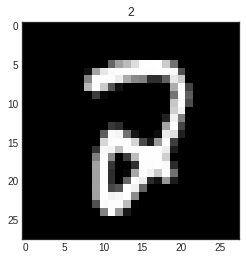

In [97]:
plt.title(label)
plt.imshow(image, 'gray')
plt.show()

## 각 Layer 설명

In [98]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

### nn.Conv2d

- `in_channels`: channel의 갯수

- `out_channels`: 출력 채널의 갯수

- `kernel_size`: 커널(필터) 사이즈

- 텐서플로우, 케라스와 다르게 레이어의 `input`인자에도 값을 집어 넣어줘야함

In [99]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [100]:
layer = nn.Conv2d(1, 20, 5, 1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

- `weight`확인

In [101]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

- `weight`는 `detach()`를 통해 꺼내줘야 `numpy()`변환이 가능

In [102]:
weight = weight.detach()

In [103]:
weight = weight.numpy()
weight.shape

(20, 1, 5, 5)

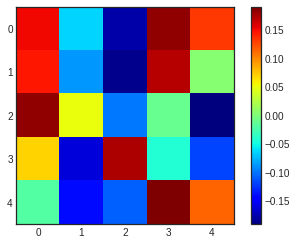

In [104]:
plt.imshow(weight[0, 0, :, :], 'jet')
plt.colorbar()
plt.show()

In [105]:
print(images.shape)

torch.Size([8, 1, 28, 28])


In [106]:
input_image = torch.unsqueeze(images[0], dim=0)

In [107]:
output_data = layer(input_image)

In [108]:
output = output_data.data

In [110]:
output_arr = output.numpy()
output_arr.shape

(1, 20, 24, 24)

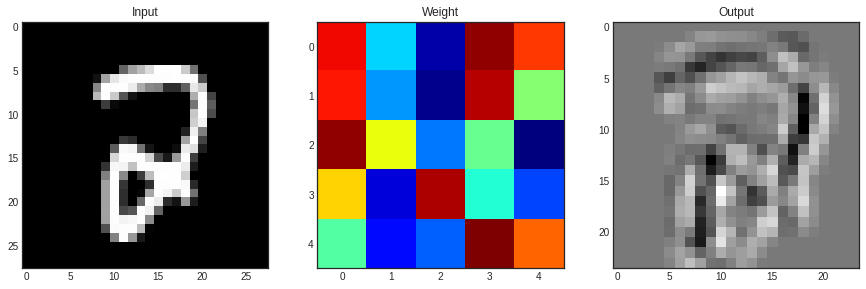

In [111]:
plt.figure(figsize=(15, 30))

plt.subplot(131)
plt.title("Input")
plt.imshow(image, 'gray')
plt.subplot(132)
plt.title("Weight")
plt.imshow(weight[0, 0, :, :], 'jet')
plt.subplot(133)
plt.title("Output")
plt.imshow(output_arr[0, 0, :, :], 'gray')
plt.show()

### Pooling
- `F.max_pool2d` 
  - `stride`

  - `kernel_size`

- `torch.nn.MaxPool2d` 도 많이 사용

In [112]:
image.shape

(28, 28)

In [115]:
pool_arr = F.max_pool2d(output, 2, 2)
pool_arr.shape

torch.Size([1, 20, 12, 12])

- MaxPool Layer는 weight가 없기 때문에 바로 `numpy()`변환 가능

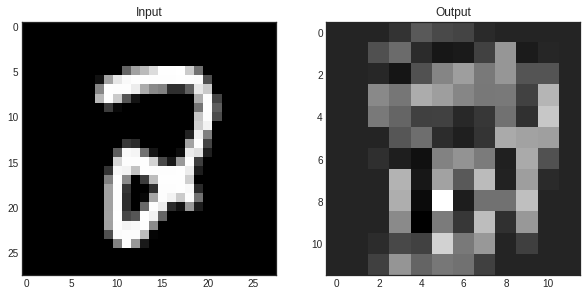

In [116]:
plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.title("Input")
plt.imshow(image, 'gray')
plt.subplot(122)
plt.title("Output")
plt.imshow(pool_arr[0, 0, :, :], 'gray')
plt.show()

### Linear
- 1d만 가능 `.view()`를 통해 1D로 펼쳐줘야함

In [117]:
image = torch.from_numpy(image)
image.shape

torch.Size([28, 28])

In [118]:
flatten = image.view(1, 28 * 28)
flatten.shape

torch.Size([1, 784])

In [119]:
lin = nn.Linear(784, 10)(flatten)
lin.shape

torch.Size([1, 10])

In [120]:
lin

tensor([[-0.2519, -1.5713, -0.1467, -0.7379, -0.3111,  0.7812,  0.0447, -1.0106,
         -0.6955,  0.0932]], grad_fn=<AddmmBackward0>)

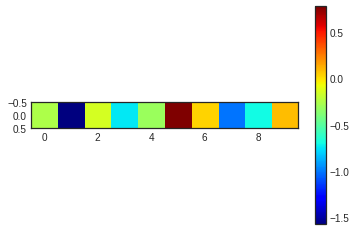

In [121]:
plt.imshow(lin.detach().numpy(), 'jet')
plt.colorbar()
plt.show()

### Softmax

In [124]:
with torch.no_grad():
  flatten = image.view(1, 28*28)
  lin = nn.Linear(784, 10)(flatten)
  softmax = F.softmax(lin, dim=1)

In [125]:
softmax

tensor([[0.2653, 0.0930, 0.0729, 0.0743, 0.1398, 0.0602, 0.0309, 0.0958, 0.0890,
         0.0788]])

In [126]:
np.sum(softmax.numpy())

1.0

### F.relu

- ReLU 함수를 적용하는 레이어

- `nn.ReLU`로도 사용 가능

In [127]:
inputs = torch.randn(4, 3, 28, 28).to(device)
inputs.shape

torch.Size([4, 3, 28, 28])

In [129]:
layer = nn.Conv2d(3, 20, 5, 1).to(device)
output = F.relu(layer(inputs))
output.shape

torch.Size([4, 20, 24, 24])

## Optimizer

- `import torch.optim as optim`

- `model`의 파라미터를 업데이트

- 예시)
  ```python
  optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
  optimizer = optim.SGD(model.parameters(), lr=0.001)
  ```

- `.zero_grad()`로 초기화
- `.step()`으로 업데이트

